# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [58]:
import zipfile

import numpy as np
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

with zipfile.ZipFile("../data/GlobalLandTemperaturesByMajorCity.csv.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [59]:
weather_df = df[df["dt"] >= "1850-01-01"]
weather_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
12,1850-01-01,25.803,1.943,Abidjan,Côte D'Ivoire,5.63N,3.23W
13,1850-02-01,27.890,1.430,Abidjan,Côte D'Ivoire,5.63N,3.23W
14,1850-03-01,27.852,2.173,Abidjan,Côte D'Ivoire,5.63N,3.23W
15,1850-04-01,26.547,1.662,Abidjan,Côte D'Ivoire,5.63N,3.23W
16,1850-05-01,25.379,1.355,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

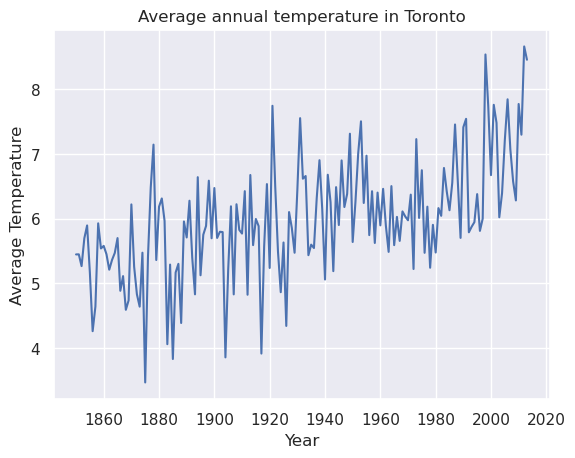

In [60]:
toronto_df = weather_df[weather_df["City"] == "Toronto"]
toronto_average_annual_temp = toronto_df.groupby(toronto_df.dt.dt.year)["AverageTemperature"].mean()

plt.plot(toronto_average_annual_temp)
plt.title("Average annual temperature in Toronto")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.show()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [61]:
temp_variance = weather_df.groupby(["City", "Latitude"]).agg(TemperatureVariance=("AverageTemperature", np.var))
temp_variance["TemperatureVariance"].idxmax()

('Harbin', '45.81N')

# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

In [62]:
temp_variance = temp_variance.reset_index()

def mean_year_month_temp(year: int = 1975, month: int = 1):
    date = weather_df[(weather_df.dt.dt.year==year) & (weather_df.dt.dt.month==month)]
    mean_temp_in_month = date.groupby(["City", "Latitude"]).agg(MeanTemperature=("AverageTemperature", np.mean)).reset_index()
    return mean_temp_in_month

mean_temp_january_1975 = mean_year_month_temp(year=1975, month=1)
mean_temp_july_1975 = mean_year_month_temp(year=1975, month=7)

In [63]:
df_for_graph = temp_variance
df_for_graph["AverageTemperatureInJanuary1975"] = mean_temp_january_1975["MeanTemperature"]
df_for_graph["AverageTemperatureInJuly1975"] = mean_temp_july_1975["MeanTemperature"]

df_for_graph.insert(2, "Side", df_for_graph["Latitude"].str[-1:])
df_for_graph["Latitude"] = df_for_graph["Latitude"].str[:-1].astype(np.float64)
df_for_graph.loc[df_for_graph["Side"] == 'S', "Latitude"] = -df_for_graph["Latitude"]

df_for_graph = df_for_graph.sort_values(by=["Latitude"])
df_for_graph

,City,Latitude,Side,TemperatureVariance,AverageTemperatureInJanuary1975,AverageTemperatureInJuly1975
61,Melbourne,-37.78,S,15.956456,17.305,9.868
89,Sydney,-34.56,S,4.793517,19.328,15.098
17,Cape Town,-32.95,S,8.961925,19.827,11.742
81,Santiago,-32.95,S,22.526325,12.468,-1.101
28,Durban,-29.74,S,3.870226,22.529,17.711
...,...,...,...,...,...,...
48,Kiev,50.63,N,94.426753,-0.440,20.142
54,London,52.24,N,25.545807,6.581,17.921
10,Berlin,52.24,N,51.078270,5.252,19.986
65,Moscow,55.45,N,104.704344,-4.243,18.012


<AxesSubplot:xlabel='Latitude', ylabel='Temperature'>

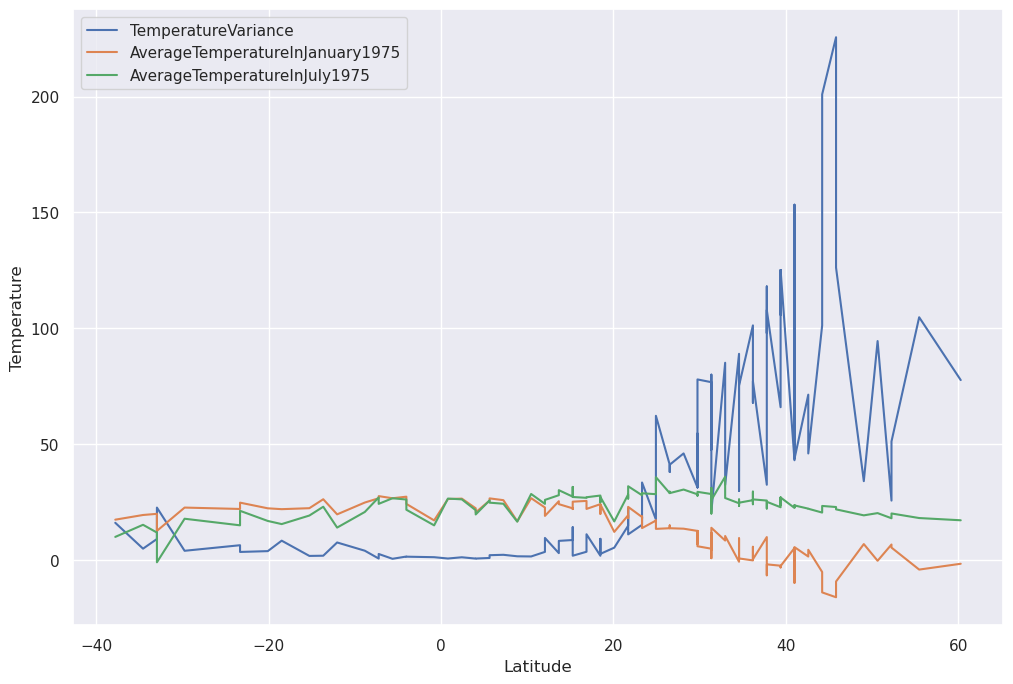

In [64]:
df_for_graph.plot(x="Latitude", 
                 y=["TemperatureVariance", "AverageTemperatureInJanuary1975", "AverageTemperatureInJuly1975"], 
                 figsize=(12,8),
                 ylabel="Temperature"
                 )

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

In [65]:
saint_petersburg_df = weather_df[weather_df["City"] == "Saint Petersburg"]
saint_petersburg_df.dropna()

saint_p_average_annual_temp = saint_petersburg_df.groupby(saint_petersburg_df["dt"].dt.year).agg(MeanTemperature=("AverageTemperature", np.mean)).reset_index()

saint_p_average_annual_temp['+deltaMeanTemperature'] = saint_p_average_annual_temp['MeanTemperature'] - saint_p_average_annual_temp['MeanTemperature'].shift(1)
saint_p_average_annual_temp['-deltaMeanTemperature'] = saint_p_average_annual_temp['MeanTemperature'] - saint_p_average_annual_temp['MeanTemperature'].shift(-1)

positive_years = saint_p_average_annual_temp.loc[(saint_p_average_annual_temp['+deltaMeanTemperature'] > 0) 
                                                        & (saint_p_average_annual_temp['-deltaMeanTemperature'] > 0)]

x_values = positive_years["dt"].to_numpy()
y_values = positive_years["MeanTemperature"].to_numpy()

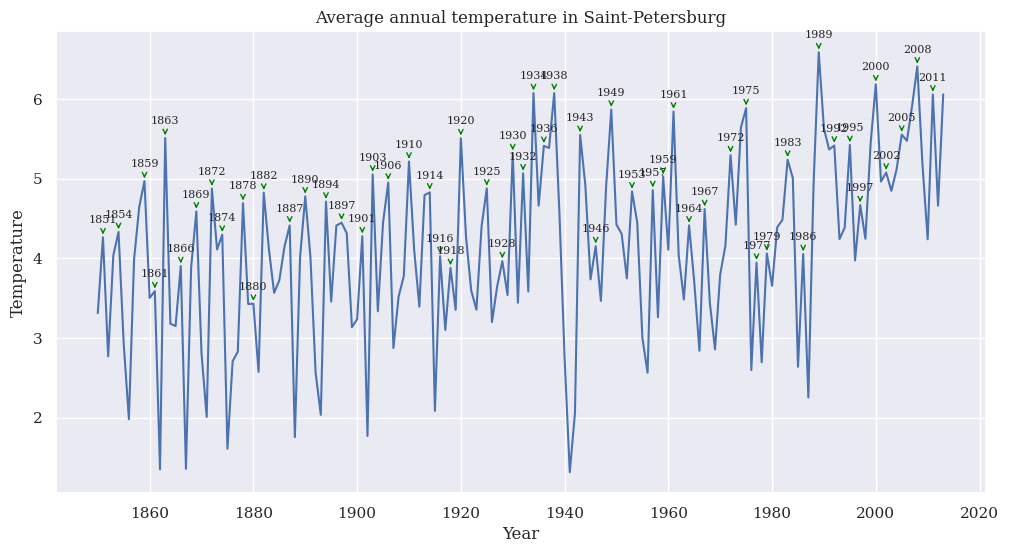

In [66]:
def average_annual_temp(df, xval, yval):
        fig = plt.gcf()
        fig.set_size_inches(12, 6)
        font = {'family' : 'serif',
                'weight' : 'light',
                'size': 8}
        plt.rc('font', **font)

        plt.plot(df["dt"], 
                 df["MeanTemperature"])

        plt.xlabel("Year")
        plt.ylabel("Temperature")
        plt.title("Average annual temperature in Saint-Petersburg")

        for x,y in zip(xval, yval):
                label = x
                
                plt.annotate(label, 
                                (x,y),
                                textcoords="offset points",
                                xytext=(0,10),
                                ha='center',
                                arrowprops=dict(arrowstyle="->", color='green'),
                                )

average_annual_temp(saint_p_average_annual_temp, x_values, y_values)

Coefficients: 
 [0.00737165]
Mean squared error: 0.85


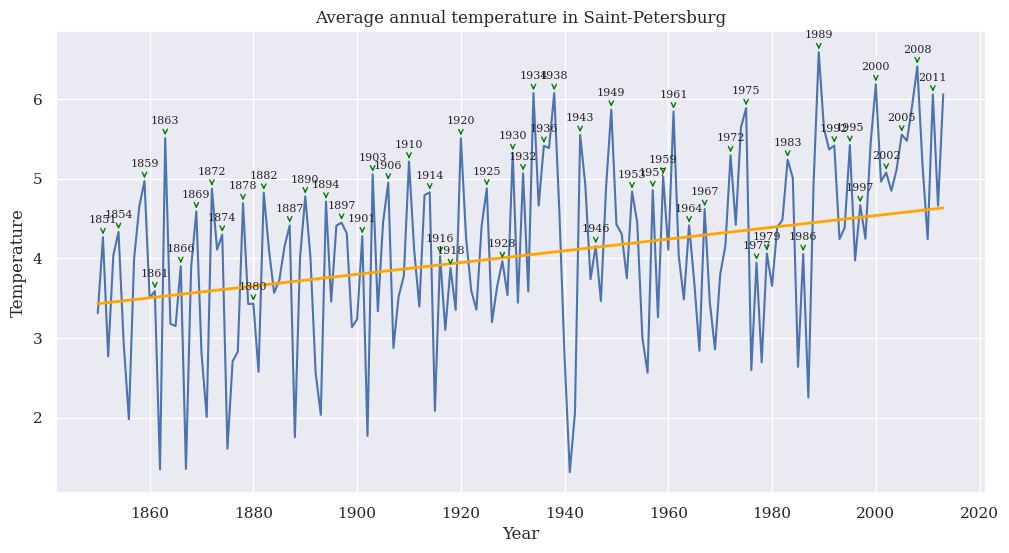

In [67]:
X = np.array(saint_p_average_annual_temp["dt"])
y = np.array(saint_p_average_annual_temp["MeanTemperature"].to_numpy())
X = np.array(X).reshape((len(X), 1))

X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

average_annual_temp(saint_p_average_annual_temp, x_values, y_values)
plt.plot(X, regr.predict(X), color="orange", linewidth=2)
plt.show()

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество дней с отрицательной температурой в году.

1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.

In [68]:
average_annual_temperature = weather_df.groupby(["City", weather_df.dt.dt.year]).agg(AverageAnnualTemperature=("AverageTemperature", np.mean)).reset_index()

min_max_annual_temp = average_annual_temperature.groupby(["City"]).agg(MaxAnnualTemperature=("AverageAnnualTemperature", np.max),
                                                                       MinAnnualTemperature=("AverageAnnualTemperature", np.min))

min_max_annual_temp["DifferenceTemperature"] = min_max_annual_temp["MaxAnnualTemperature"] - min_max_annual_temp["MinAnnualTemperature"] 

print(min_max_annual_temp["DifferenceTemperature"].max()) 
print(min_max_annual_temp["DifferenceTemperature"].idxmax())

6.4005833333333335
Calcutta


2. Самая большая средняя разница между средней температурой января и средней температурой июля.

In [69]:
def mean_month_temp(month: int = 1):
    date = weather_df[weather_df.dt.dt.month==month]
    mean_temp_in_month = date.groupby(["City"]).agg(MeanTemperature=("AverageTemperature", np.mean))
    return mean_temp_in_month

df_january = mean_month_temp(month=1)
df_july = mean_month_temp(month=7)

df_january["DifferenceTemperature"] = np.abs(df_july["MeanTemperature"] - df_january["MeanTemperature"])

print(df_january["DifferenceTemperature"].max())
print(df_january["DifferenceTemperature"].idxmax())

42.88770731707317
Harbin


Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [70]:
temperature_below_zero = weather_df.groupby(["City", weather_df["dt"].dt.year])["AverageTemperature"].apply(lambda x: (x < 0).sum()).reset_index(name="count")
mean_month_count = temperature_below_zero.groupby(["City"]).agg(MeanMonthCount=("count", np.mean))

print(mean_month_count["MeanMonthCount"].max())
print(mean_month_count["MeanMonthCount"].idxmax())

4.963414634146342
Harbin


# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению температуры в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) Используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и угол наклона последнего сегмента. 

In [92]:
heatmap = weather_df[(weather_df.dt.dt.year>=2004) & (weather_df.dt.dt.month==1)].groupby(["City", "Latitude", "Longitude"])["AverageTemperature"].mean().reset_index()
heatmap


,City,Latitude,Longitude,AverageTemperature
0,Abidjan,5.63N,3.23W,27.2830
1,Addis Abeba,8.84N,38.11E,18.2239
2,Ahmadabad,23.31N,72.52E,19.9577
3,Aleppo,36.17N,37.79E,5.9257
4,Alexandria,31.35N,30.16E,14.8218
...,...,...,...,...
95,Tokyo,36.17N,139.23E,1.8162
96,Toronto,44.20N,80.50W,-6.7642
97,Umm Durman,15.27N,32.50E,23.3256
98,Wuhan,29.74N,114.46E,3.7445


In [93]:
heatmap.insert(2, "LatitudeSide", heatmap["Latitude"].str[-1:])
heatmap.insert(4, "LongitudeSide", heatmap["Longitude"].str[-1:])

heatmap["Latitude"] = heatmap["Latitude"].str[:-1].astype(np.float64)
heatmap["Longitude"] = heatmap["Longitude"].str[:-1].astype(np.float64)

heatmap.loc[heatmap["LatitudeSide"] == 'S', "Latitude"] = -heatmap["Latitude"]
heatmap.loc[heatmap["LongitudeSide"] == 'W', "Longitude"] = -heatmap["Longitude"]

In [94]:
heatmap

,City,Latitude,LatitudeSide,Longitude,LongitudeSide,AverageTemperature
0,Abidjan,5.63,N,-3.23,W,27.2830
1,Addis Abeba,8.84,N,38.11,E,18.2239
2,Ahmadabad,23.31,N,72.52,E,19.9577
3,Aleppo,36.17,N,37.79,E,5.9257
4,Alexandria,31.35,N,30.16,E,14.8218
...,...,...,...,...,...,...
95,Tokyo,36.17,N,139.23,E,1.8162
96,Toronto,44.20,N,-80.50,W,-6.7642
97,Umm Durman,15.27,N,32.50,E,23.3256
98,Wuhan,29.74,N,114.46,E,3.7445


In [57]:
geometry = geopandas.points_from_xy(weather_df.Longitude, weather_df.Latitude)
geo_df = geopandas.GeoDataFrame(
    weather_df[["dt", "AverageTemperature", "AverageTemperatureUncertainty", "City", "Country"]], geometry=geometry
)

geo_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,geometry
12,1850-01-01,25.803,1.943,Abidjan,Côte D'Ivoire,POINT (-3.23000 5.63000)
13,1850-02-01,27.890,1.430,Abidjan,Côte D'Ivoire,POINT (-3.23000 5.63000)
14,1850-03-01,27.852,2.173,Abidjan,Côte D'Ivoire,POINT (-3.23000 5.63000)
15,1850-04-01,26.547,1.662,Abidjan,Côte D'Ivoire,POINT (-3.23000 5.63000)
16,1850-05-01,25.379,1.355,Abidjan,Côte D'Ivoire,POINT (-3.23000 5.63000)
